# A working example for tierra

Check if the cross-section location has been properly set up. Cross-sections can be downloaded from .....

In [1]:
import os
CS_LOCATION = os.getenv('CS_LOCATION')

Now let us evaluate a simple model

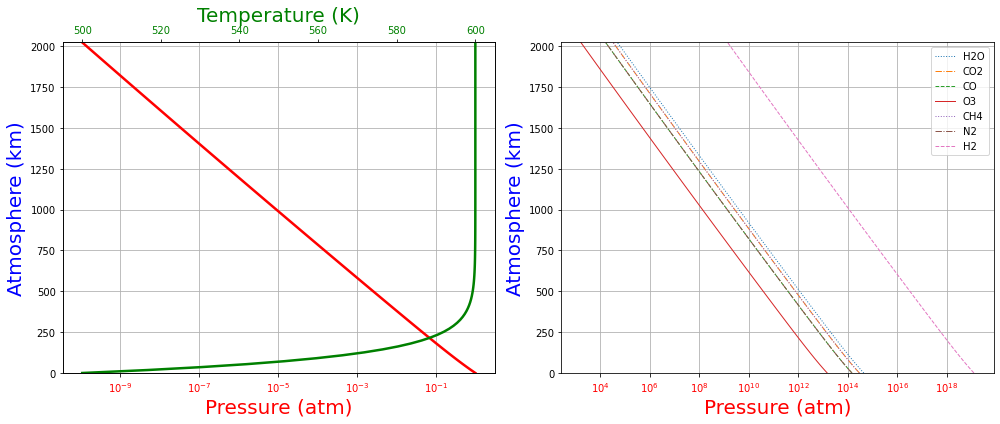

0 :  H2O
1 :  CO2
2 :  CO
3 :  O3
4 :  CH4
5 :  N2
6 :  H2


In [3]:
from tierra import Target
from tierra.transmission import TransmissionSpectroscopy


#Change the target system parameters. Following are the planetary parameters.
PlanetParamsDict = {}
PlanetParamsDict['P0'] = 1.0 #atmosphere
PlanetParamsDict['T0'] = 500.
PlanetParamsDict['ALR'] = 0.01
PlanetParamsDict['TInf'] = 600
PlanetParamsDict['Mass'] = 317.8  #in earth mass
PlanetParamsDict['Radius'] = 11.21 #in earth radius
PlanetParamsDict['MR_CO'] = 1e-5
PlanetParamsDict['MR_CO2'] = 2e-5
PlanetParamsDict['MR_H2O'] = 3e-5
PlanetParamsDict['MR_CH4'] = 2e-5
PlanetParamsDict['MR_O3'] = 1e-6
PlanetParamsDict['MR_N2'] = 1e-5


MR_H2 = 85./100.*(1.0 -PlanetParamsDict['MR_CO'] -PlanetParamsDict['MR_CO2']  \
                -PlanetParamsDict['MR_H2O']-PlanetParamsDict['MR_CH4']  \
                -PlanetParamsDict['MR_O3']-PlanetParamsDict['MR_N2'])

PlanetParamsDict['MR_H2'] = MR_H2 #The mixing ratio should add upto 1. Hydrogen and Helium are added together so as to make this add up to 1.

#Change the target system parameters. Following are the stellar parameters.
StellarParamsDict = {}
StellarParamsDict['Mass'] = 0.55
StellarParamsDict['Radius'] = 0.55

#Initiate a planet-star system
Planet1 = Target.System(PlanetParamsDict=PlanetParamsDict, StellarParamsDict=StellarParamsDict, LoadFromFile=False)
Planet1.PT_Profile(zStep=0.25, ShowPlot=True)
Planet1.LoadCrossSection(CS_LOCATION, SubFolder="CS_1")



Now let us evaluate the transmission model we obtained.

In [5]:
T1 = TransmissionSpectroscopy(Planet1)
print("Now Calculating the transmission spectra")
Spectrum, SpectrumHeight = T1.CalculateTransmission(Planet1)

/home/prajwal/Desktop/GITHUB_TEMP/tierra/tierra/transmission.py:27: RuntimeWarning: invalid value encountered in sqrt
  self.x__ = np.sqrt((Target.Rp+Z_ii)*(Target.Rp+Z_ii)


Now Calculating the transmission spectra


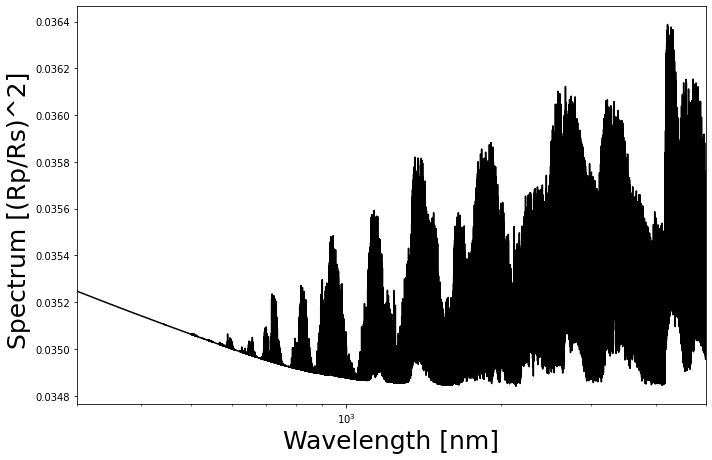

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6.5), nrows=1, ncols=1, sharex=True)
ax.plot(Planet1.WavelengthArray*1e7, T1.Spectrum, "k-")
ax.set_xlim([300,5000])
ax.set_xscale('log')
ax.set_xlabel("Wavelength [nm]", fontsize=25)
ax.set_ylabel("Spectrum [(Rp/Rs)^2] ", fontsize=25)
plt.tight_layout()
plt.show()